## Analise Descritiva 


Um grande banco tem o objetivo de desenvolver um modelo para identificar maior probabilidade de default. Sua tarefa será realizar uma análise descritiva e tratamento dos dados para entender o perfil dos clientes e quais fatores podem influenciar no risco de crédito.

### Base de Dados

Disponibilizada pelo curso de Estatistica Descritiva 09-22 da Semantix Academy

In [452]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics  as sts
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [ ]:
#esquema de cores
primary = ['#226666','#AA3939' ]
#sns.palplot(sns.color_palette(primary))

In [453]:
credito_arquivo = pd.read_csv('risco_credito.csv')


In [454]:
credito_arquivo.head()

,default,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,signo,genero,perfil_facebook,n_emprestimos_inadiplentes
0,False,0.43,20024.31,60.0,62386.0,59869.05,virg,f,True,0.0
1,False,0.23,10046.51,36.0,NaN,46016.31,sagi,f,False,0.0
2,False,0.30,21228.25,60.0,NaN,48025.47,libr,m,True,0.0
3,False,0.15,23032.33,36.0,NaN,46011.12,NaN,m,False,0.0
4,False,0.08,24026.29,36.0,32366.0,90026.17,libr,m,NaN,0.0


In [455]:
print("\nDimensões de credito:\n{0}\n".format(credito_arquivo.shape))
print("\nCampos de credito:\n{0}\n".format(list(credito_arquivo.keys())))
print("\nTipos dos credito:\n{0}\n".format(credito_arquivo.dtypes))



Dimensões de credito:
(64592, 10)


Campos de credito:
['default', 't_risco', 'valor_emprestimo', 'prazo_pagamento', 'limite_credito', 'renda', 'signo', 'genero', 'perfil_facebook', 'n_emprestimos_inadiplentes']


Tipos dos credito:
default                        object
t_risco                       float64
valor_emprestimo              float64
prazo_pagamento               float64
limite_credito                float64
renda                         float64
signo                          object
genero                         object
perfil_facebook                object
n_emprestimos_inadiplentes    float64
dtype: object



### Descrição dos atributos


*   ``default`` -- False/True
*   ``t_risco`` -- valores flutuantes (float entre 0 e 1)
*   ``valor_emprestimo`` -- valor de moeda no formato flutuante com valor do empréstimo realizado
*   ``prazo_pagamento`` -- numero de parcela em meses para o pagamento em valores flutuantes
*   ``limite_credito`` -- valor de moeda no formato flutuante com valor do limite de crédito
*   ``renda`` -- valor de moeda no formato flutuante com valor da renda do cliente 
*   ``signo`` -- objeto (int) com o signo do cliente
*   ``genero`` -- genero do cliente (masculino = m ; feminino = f)
*   ``perfil_facebook`` -- se o cliente possui perfil no facebook (Sim = True; Não = False)
*   ``n_emprestimos_inadiplentes`` -- se o cliente já possui algum empréstimo inadimplente ?

In [456]:
print("\nValores nulos: \n{0}\n".format(credito_arquivo.isnull().sum()))


Valores nulos: 
default                        4626
t_risco                         785
valor_emprestimo                785
prazo_pagamento                 785
limite_credito                19753
renda                           785
signo                         20767
genero                         7186
perfil_facebook                6407
n_emprestimos_inadiplentes      803
dtype: int64



Calculo da porcentagem de Valores nulos

In [457]:
## contagem dos valores faltantes em %

percentage_result = credito_arquivo.isnull().sum()/credito_arquivo.shape[0] * 100

In [458]:
# DataFrame para mostrar os valores faltantes
percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "%": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result

,columns,%
0,default,7.161878
1,t_risco,1.215321
2,valor_emprestimo,1.215321
3,prazo_pagamento,1.215321
4,limite_credito,30.581187
5,renda,1.215321
6,signo,32.151040
7,genero,11.125217
8,perfil_facebook,9.919185
9,n_emprestimos_inadiplentes,1.243188


Nas colunas t_risco, valor_emprestimo, prazo_pagamento e renda há a mesma quantidade de valores faltantes, por isso é importante verificar se esses valores são os mesmos e se é possível descartar esses dados


In [459]:
#Filtrando com apenas os dados NaN em um DataFrame
valores_Nan = pd.isnull(credito_arquivo["n_emprestimos_inadiplentes"])
display_nan = credito_arquivo[valores_Nan]

In [460]:
valores_Nan

0        False
1        False
2        False
3        False
4        False
         ...  
64587    False
64588    False
64589    False
64590    False
64591    False
Name: n_emprestimos_inadiplentes, Length: 64592, dtype: bool

In [461]:
#display_nan.head(50)

Como se trata de aproximadamente 1,2% dos dados e vizulizando na tabela acima que a maioria dos valores faltantes não tem informações também para outras colunas, decidi remover os valores faltantes para a coluna t_risco

In [462]:
credito_arquivo.dropna(subset=['t_risco'], inplace = True)

In [463]:
print("\nDimensões de credito:\n{0}\n".format(credito_arquivo.shape))


Dimensões de credito:
(63807, 10)



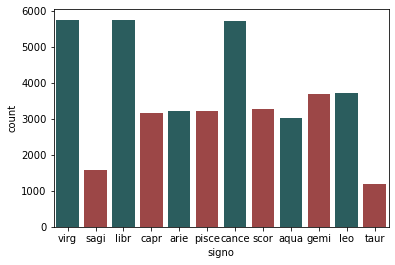

In [464]:
sns.countplot(credito_arquivo['signo'], palette = primary)

Embora ter o valor de qual signo é mais inadimplente seja divertido, ele não é relevante para uma análise de crédito na vida real além disso o comportamento dos dados não é muito diferente e há muitos dados faltantes nessa coluna então decidi remove-la.

In [465]:
credito_arquivo.drop(columns = 'signo', inplace = True)

### ESTATÍSTICA DESCRITIVA DOS DADOS

In [466]:
print(credito_arquivo.describe().round(4))

          t_risco  valor_emprestimo  prazo_pagamento  limite_credito  \
count  63807.0000        63807.0000       63807.0000      44839.0000   
mean       0.2964        13853.2829          41.8353      34562.0076   
std        0.1015         8105.6626          10.2956      37041.8671   
min        0.0000          527.0700          36.0000          0.0000   
25%        0.2200         7762.9450          36.0000      10000.0000   
50%        0.2900        12023.6800          36.0000      25775.0000   
75%        0.3600        19384.8150          36.0000      47326.5000   
max        0.9000        35059.6000          60.0000     613117.0000   

              renda  n_emprestimos_inadiplentes  
count  6.380700e+04                  63789.0000  
mean   7.180972e+04                      0.0047  
std    5.124993e+04                      0.0790  
min    4.821180e+03                      0.0000  
25%    4.501336e+04                      0.0000  
50%    6.139916e+04                      0.0000  
7

## Perfil

*   O valor dos empréstimos variam  R$ 527,00 a R$ 35.000,00 sendo que 75% dos empréstimos foram valores de até R$ 19.384,00.

*   A maioria e o valor mínimo dos prazos de pagamento foram de 36 meses sendo que o maior prazo foi de 60 meses.
*   75% das pessoas que fizeram empréstimo tinham renda de até R$ 8.6026,00 sendo que a média de renda foi de 7.1809,00
*   Aproximadamente 68% das pessoas fizeram empréstimo eram do sexo masculino
*   99% não possuem empréstimos inadimplentes

In [467]:
# Para se ter uma visão dos atributos categóricos, os atributos não numéricos são descartados. 

categ = credito_arquivo.dtypes[credito_arquivo.dtypes == "object"].index

print("\n", credito_arquivo[categ].describe(), sep='\n')



       default genero perfil_facebook
count    59966  57339           57474
unique       2      2               2
top      False      m           False
freq     50456  38833           35514


In [468]:
credito_arquivo['genero'].value_counts(normalize=True)

m    0.677253
f    0.322747
Name: genero, dtype: float64

In [469]:
credito_arquivo['default'].value_counts(normalize=True)

False    0.84141
True     0.15859
Name: default, dtype: float64

In [470]:
credito_arquivo['perfil_facebook'].value_counts(normalize=True)

False    0.617914
True     0.382086
Name: perfil_facebook, dtype: float64

In [471]:
credito_arquivo['n_emprestimos_inadiplentes'].value_counts(normalize=True)

0.0    0.995924
1.0    0.003559
2.0    0.000439
3.0    0.000063
5.0    0.000016
Name: n_emprestimos_inadiplentes, dtype: float64

### VALORES OMISSOS OU INCONSISTENTES

Sobraram muitos dados NaN nas colunas limite_credito e n_emprestimos_inadiplentes, esses valores serão substituidos por suas respectivas medianas para ter menor interferência na variabilidade dos resultados

Analisando o atributo ```limite_credito``` para tratarm os valores omissos.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x210608E0>]],
      dtype=object)

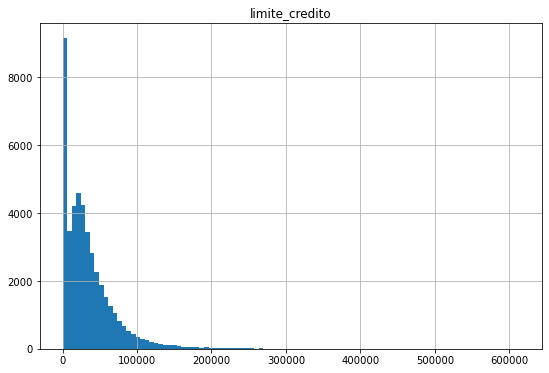

In [472]:
credito_arquivo.hist(column='limite_credito',    # Coluna a ser plotada
                   figsize=(9,6),   # Tamanho do gráfico
                   bins=100)         # Numero de colunas do histogram


Análise do novo atributo limite_credito:
count     63807.00
mean      31949.88
std       31310.34
min           0.00
25%       17156.00
50%       25775.00
75%       36279.00
max      613117.00
Name: limite_credito, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1EE1E5C8>]],
      dtype=object)

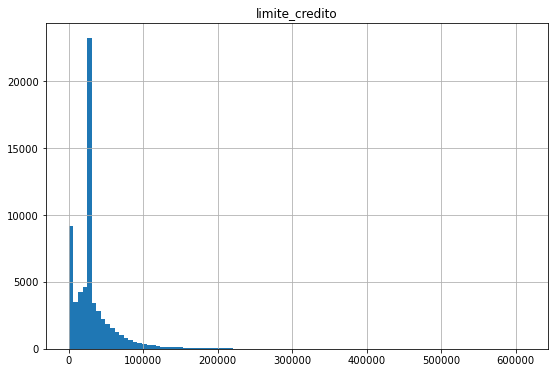

In [473]:
mediana = np.median([el for el in credito_arquivo["limite_credito"] if (np.isnan(el) == False)])

novo_limite_credito = np.where(credito_arquivo["limite_credito"].isnull(), mediana, credito_arquivo["limite_credito"])          
credito_arquivo["limite_credito"] = novo_limite_credito

print("\nAnálise do novo atributo limite_credito:")
print(credito_arquivo["limite_credito"].describe().round(2))

credito_arquivo.hist(column='limite_credito', figsize=(9,6), bins=100)


Analisando o atributo ```n_emprestimos_inadiplentes``` para tratarm os valores omissos.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1EE50AA8>]],
      dtype=object)

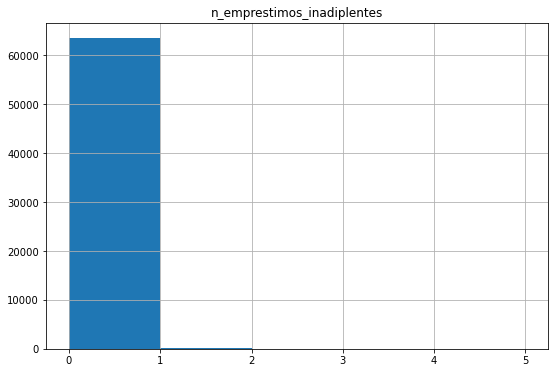

In [474]:
credito_arquivo.hist(column='n_emprestimos_inadiplentes', figsize=(9,6), bins=5)


Análise do novo atributo n_emprestimos_inadiplentes:
count    63807.00
mean         0.00
std          0.08
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          5.00
Name: n_emprestimos_inadiplentes, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x211AAE68>]],
      dtype=object)

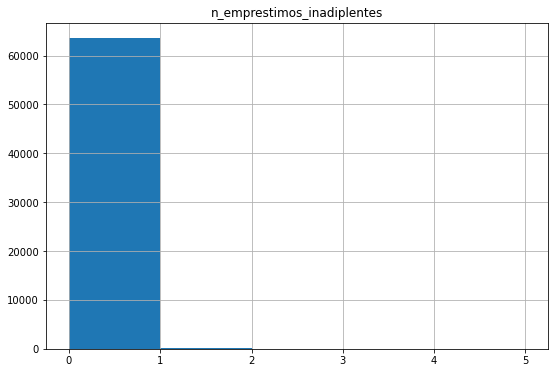

In [475]:
mediana = np.median([el for el in credito_arquivo["n_emprestimos_inadiplentes"] if (np.isnan(el) == False)])

novo_n_emprestimos_inadiplentes= np.where(credito_arquivo["n_emprestimos_inadiplentes"].isnull(), mediana, credito_arquivo["n_emprestimos_inadiplentes"])          
credito_arquivo["n_emprestimos_inadiplentes"] = novo_n_emprestimos_inadiplentes

print("\nAnálise do novo atributo n_emprestimos_inadiplentes:")
print(credito_arquivo["n_emprestimos_inadiplentes"].describe().round(2))

credito_arquivo.hist(column='n_emprestimos_inadiplentes', figsize=(9,6), bins=5)

In [476]:
CV_t_risco = sts.stdev(credito_arquivo['t_risco'])/sts.mean(credito_arquivo['t_risco'])
CV_valor_emprestimo = sts.stdev(credito_arquivo['valor_emprestimo'])/sts.mean(credito_arquivo['valor_emprestimo'])
CV_prazo_pagamento = sts.stdev(credito_arquivo['prazo_pagamento'])/sts.mean(credito_arquivo['prazo_pagamento'])
CV_limite_credito = sts.stdev(credito_arquivo['limite_credito'])/sts.mean(credito_arquivo['limite_credito'])
CV_renda = sts.stdev(credito_arquivo['renda'])/sts.mean(credito_arquivo['renda'])
CV_n_emprestimos_inadiplentes = sts.stdev(credito_arquivo['n_emprestimos_inadiplentes'])/sts.mean(credito_arquivo['n_emprestimos_inadiplentes'])

In [477]:
print('CV_t_risco: \n',round(CV_t_risco,2))
print('CV_valor_emprestimo: \n',round(CV_valor_emprestimo,2))
print('CV_prazo_pagamento: \n',round(CV_prazo_pagamento,2))
print('CV_limite_credito: \n',round(CV_limite_credito,2))
print('CV_renda: \n',round(CV_renda,2))
print('CV_n_emprestimos_inadiplentes: \n',round(CV_n_emprestimos_inadiplentes,2))

CV_t_risco: 
 0.34
CV_valor_emprestimo: 
 0.59
CV_prazo_pagamento: 
 0.25
CV_limite_credito: 
 0.98
CV_renda: 
 0.71
CV_n_emprestimos_inadiplentes: 
 16.81


### OUTLIERS

Registros com valores extremos de limite de crédito:
      default  t_risco  valor_emprestimo  prazo_pagamento  limite_credito  \
54604    True     0.25          10018.09             36.0         11561.0   

          renda genero perfil_facebook  n_emprestimos_inadiplentes  
54604  38028.55      m            True                         0.0  


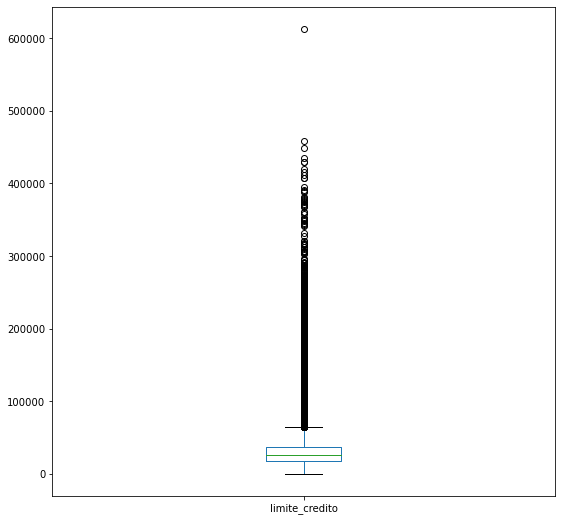

In [478]:
credito_arquivo["limite_credito"].plot(kind="box", figsize=(9,9))

index_lim_cred = np.where(credito_arquivo["limite_credito"] == max(credito_arquivo["limite_credito"]) )

print("Registros com valores extremos de limite de crédito:",credito_arquivo.loc[index_lim_cred], sep='\n')

Registros com valores extremos de renda:
      default  t_risco  valor_emprestimo  prazo_pagamento  limite_credito  \
62824   False      0.3           8018.29             36.0         25775.0   

          renda genero perfil_facebook  n_emprestimos_inadiplentes  
62824  70032.69      f            True                         0.0  


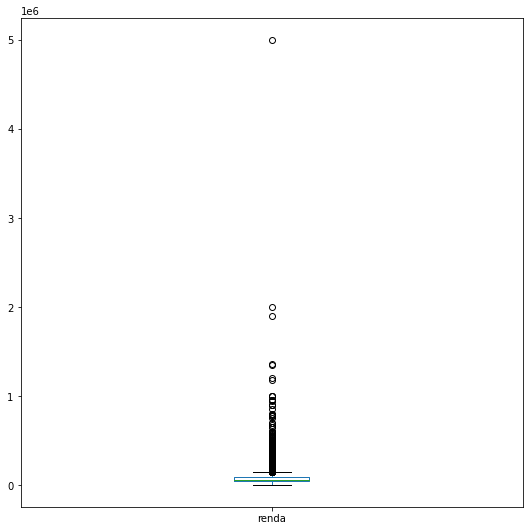

In [479]:
credito_arquivo["renda"].plot(kind="box", figsize=(9,9))

index_renda = np.where(credito_arquivo["renda"] == max(credito_arquivo["renda"]) )

print("Registros com valores extremos de renda:",credito_arquivo.loc[index_renda], sep='\n')

Registros com valores extremos de empréstimo:
      default  t_risco  valor_emprestimo  prazo_pagamento  limite_credito  \
17094   False     0.26          21022.55             36.0         89165.0   

           renda genero perfil_facebook  n_emprestimos_inadiplentes  
17094  189832.41      m            True                         0.0  


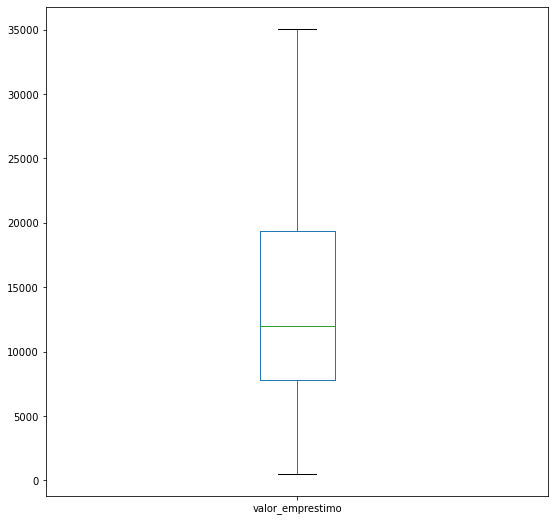

In [480]:
credito_arquivo["valor_emprestimo"].plot(kind="box", figsize=(9,9))

index_v_emprestimo = np.where(credito_arquivo["valor_emprestimo"] == max(credito_arquivo["valor_emprestimo"]) )

print("Registros com valores extremos de empréstimo:",credito_arquivo.loc[index_v_emprestimo], sep='\n')

### Remoção de Outliers



In [481]:
limite_credito_outlier = credito_arquivo[(credito_arquivo['limite_credito'] >= 50000 )].index
credito_arquivo.drop(limite_credito_outlier , inplace=True)

In [482]:
renda_outlier = credito_arquivo[(credito_arquivo['renda'] >= 1000000)]#.index
#credito_arquivo.drop(renda_outlier , inplace=True)

In [483]:
renda_outlier

,default,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,genero,perfil_facebook,n_emprestimos_inadiplentes
18898,False,0.36,2805.22,36.0,38463.0,1000035.68,m,False,0.0
23402,False,0.24,5611.99,60.0,25775.0,1176021.62,m,False,0.0
23822,False,0.34,28024.45,36.0,17987.0,1000023.87,m,False,0.0
41257,False,0.08,1515.80,36.0,25775.0,1900023.70,m,False,0.0
42471,False,0.20,6610.53,36.0,25775.0,1362027.90,f,False,0.0


In [484]:
print(credito_arquivo.describe().round(4))

          t_risco  valor_emprestimo  prazo_pagamento  limite_credito  \
count  53509.0000        53509.0000       53509.0000      53509.0000   
mean       0.2953        13228.2338          41.5289      21612.0904   
std        0.1013         7820.1059          10.1058      12427.1328   
min        0.0000          527.0700          36.0000          0.0000   
25%        0.2200         7208.3200          36.0000      13455.0000   
50%        0.2900        12005.7600          36.0000      25775.0000   
75%        0.3600        18025.1000          36.0000      25775.0000   
max        0.9000        35058.2000          60.0000      49993.0000   

              renda  n_emprestimos_inadiplentes  
count  5.350900e+04                  53509.0000  
mean   6.683068e+04                      0.0043  
std    4.181726e+04                      0.0754  
min    4.821180e+03                      0.0000  
25%    4.202094e+04                      0.0000  
50%    5.901016e+04                      0.0000  
7

## Nova Analise de Perfil

*   O valor dos empréstimos variam  R$ 527,00 a R$ 35.000,00 sendo que 75% dos empréstimos foram valores de até R$  18.024,00.

*   A maioria e o valor mínimo dos prazos de pagamento foram de 36 meses sendo que o maior prazo foi de 60 meses.

*   75% das pessoas que fizeram empréstimo tinham renda de até R$ 8.032,00.

*   Aproximadamente 68% das pessoas fizeram empréstimo eram do sexo masculino

*   99% não possuem empréstimos inadimplentes

*   De todos os clientes analisados, cerca de 16% tem default.

Text(0.5, 1.0, 'default')

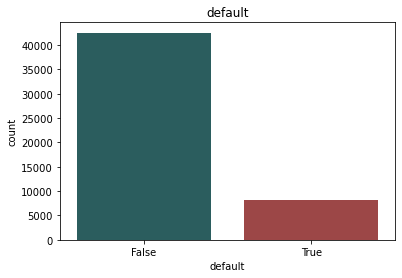

In [486]:
sns.countplot(credito_arquivo['default'], palette = primary).set_title('default')

Text(0.5, 1.0, 'renda')

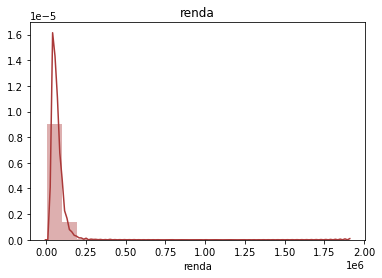

In [487]:
sns.distplot(credito_arquivo['renda'], bins=20, rug=False, color = '#AA3939' ).set_title('renda')

Text(0.5, 1.0, 't_risco')

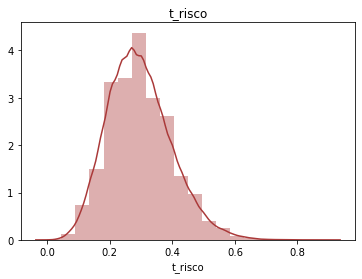

In [488]:
sns.distplot(credito_arquivo['t_risco'], bins=20, rug=False, color = '#AA3939' ).set_title('t_risco')

Text(0.5, 1.0, 'valor emprestimo')

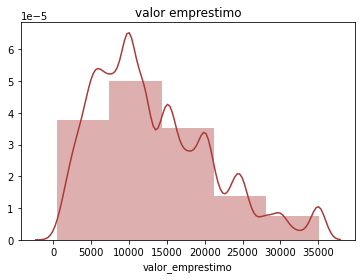

In [489]:
sns.distplot(credito_arquivo['valor_emprestimo'], bins=5, rug=False, color = '#AA3939' ).set_title('valor emprestimo')

Text(0.5, 1.0, 'limite crédito')

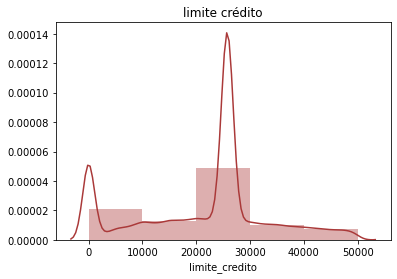

In [490]:
sns.distplot(credito_arquivo['limite_credito'], bins=5, rug=False, color = '#AA3939' ).set_title('limite crédito')

### Análise Bivariada

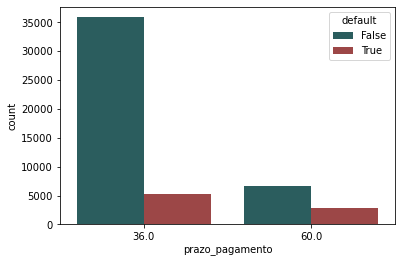

In [491]:
sns.countplot(credito_arquivo['prazo_pagamento'], hue=credito_arquivo.default, palette=primary)

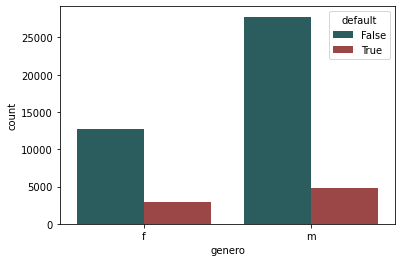

In [492]:
sns.countplot(credito_arquivo['genero'], hue=credito_arquivo.default, palette=primary)

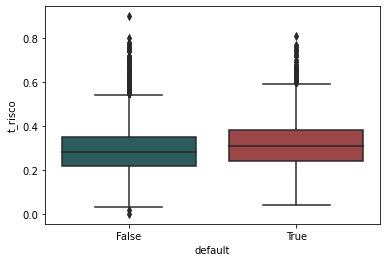

In [493]:
sns.boxplot(data=credito_arquivo, x="default", y="t_risco",palette=primary)

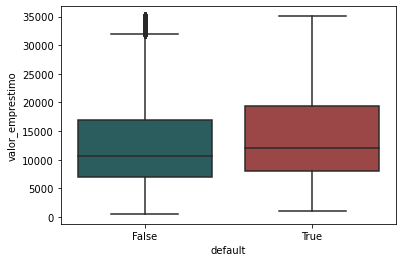

In [494]:
sns.boxplot(data=credito_arquivo, x="default", y="valor_emprestimo",palette=primary)

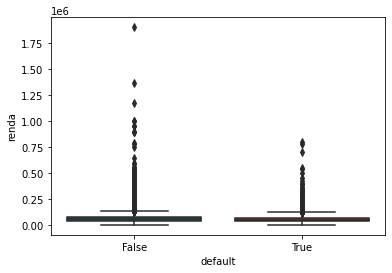

In [495]:
sns.boxplot(data=credito_arquivo, x="default", y="renda",palette=primary)

In [496]:
va_correlacao = credito_arquivo[['t_risco','renda','limite_credito','valor_emprestimo', 'n_emprestimos_inadiplentes','default']]
va_correlacao.corr()

,t_risco,renda,limite_credito,valor_emprestimo,n_emprestimos_inadiplentes
t_risco,1.000000,-0.001833,-0.015099,0.090921,0.013134
renda,-0.001833,1.000000,0.136804,0.389732,0.015444
limite_credito,-0.015099,0.136804,1.000000,0.070648,0.003648
valor_emprestimo,0.090921,0.389732,0.070648,1.000000,0.009219
n_emprestimos_inadiplentes,0.013134,0.015444,0.003648,0.009219,1.000000


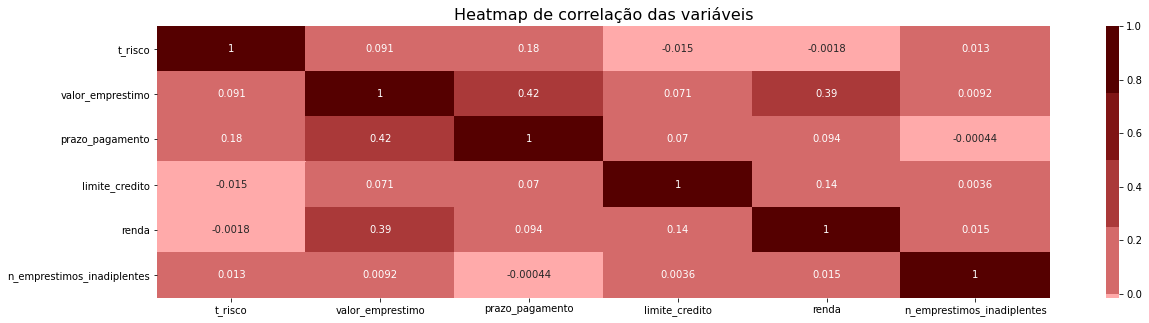

In [497]:
heatmap_color = ['#669999','#407F7F', '#226666', '#FFAAAA','#D46A6A', '#AA3939', '#801515', '#550000']
plt.figure(figsize=(20,5))
plt.title('Heatmap de correlação das variáveis', size = 16)
sns.heatmap(credito_arquivo.corr(), cmap = heatmap_color, center = 0, annot = True)

d:\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
d:\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 720x504 with 0 Axes>

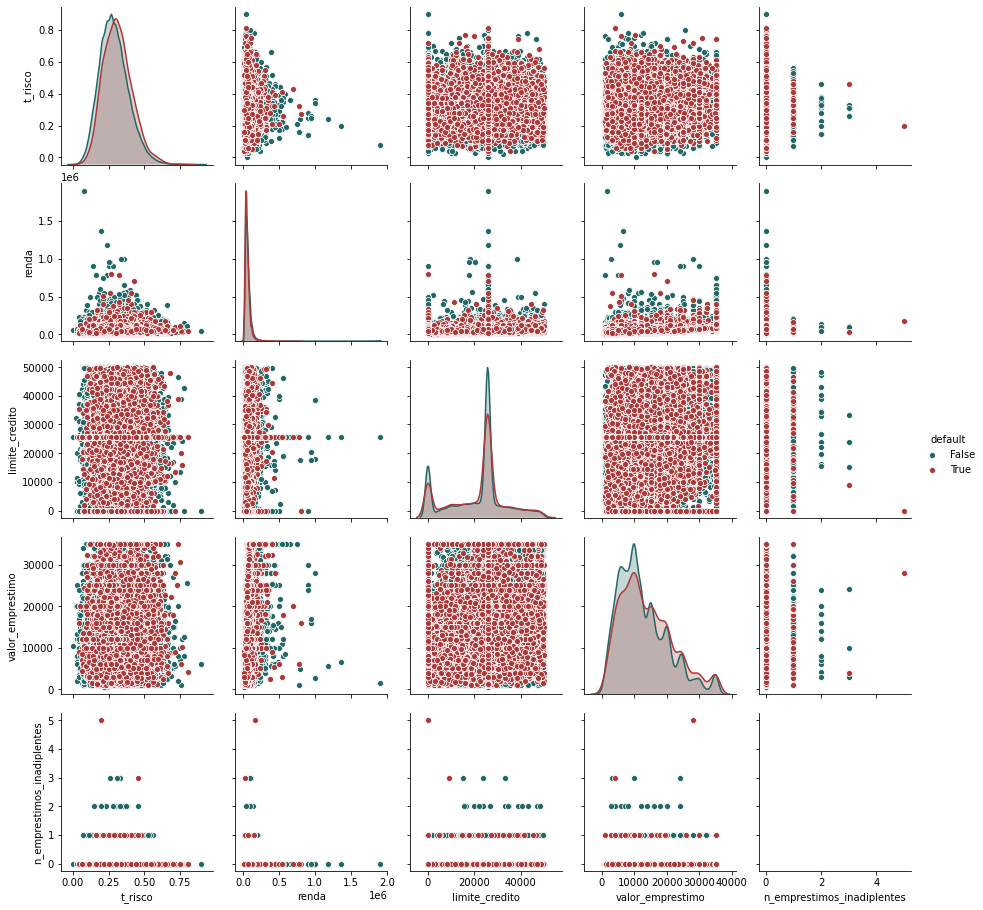

In [498]:
plt.figure(figsize=(10,7))
sns.pairplot(data=va_correlacao, hue="default", palette=primary)

# Conclusão

Com os dados fornecidos, não é possível determinar se algum deles é relevante para analisar o risco de crédito, o único fator que infere alguma diferença é o t_risco onde os inadimplentes parecem ter um valor de t_risco pouco mais elevado. Talvez não seja possível determinar uma variável que possa auxiliar na análise de risco devido ao desbalanceamento da base de dados, uma vez que os inadimplentes correspondem a apenas aproximadamente 16% da base de dados.